In [1]:
from phase_portrait import *
%matplotlib inline

In [47]:
data= pd.read_excel('bitcoin-excel.xlsx')
data= data.drop(data.columns[2], axis=1)
data.columns=['date','value', 'volume', 'capitalization']
data=data[['date','value']]
# data=data.drop(0)
data=data.reset_index(drop=True)
data['date']= pd.to_datetime(data['date'], format='%d.%m.%Y')
data

,date,value
0,2021-11-16,60425.010644
1,2021-11-15,64016.035860
2,2021-11-14,64099.343163
3,2021-11-13,64264.021087
4,2021-11-12,63963.062127
...,...,...
2142,2016-01-05,431.960000
2143,2016-01-04,433.090000
2144,2016-01-03,430.010000
2145,2016-01-02,433.440000


In [48]:
normalize_date=''
phases=generate_phase_portrait(data, [1, 7, 30])

In [49]:
deriv=phases[1][3]

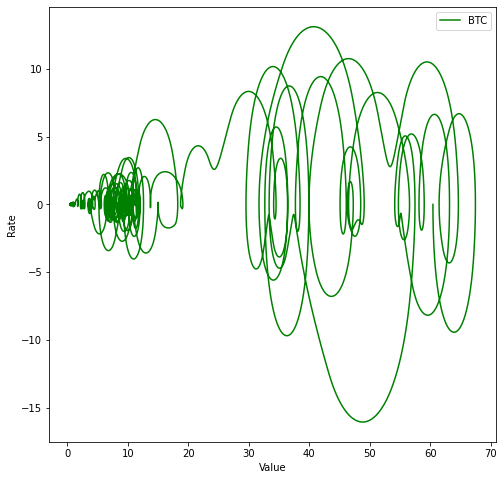

In [50]:
fig, ax = plt.subplots()
# ax.scatter(deriv[0], deriv[1], c=c_bar, s=0.05)
ax.plot(deriv[0], deriv[1], '-g')
#     ax.annotate(dates.iloc[-1].strftime('%d.%m.%y'), xy=(deriv[0][-1], deriv[1][-1]), color='black', ha="right")
ax.set_ylabel('Rate')
ax.set_xlabel('Value')

# plt.title('Сравнение показателей, нормализованных на 01.01.2000')
plt.legend(['BTC'], loc='best')

fig.set_figheight(8)
fig.set_figwidth(8)

# plt.savefig(f"Comparison_SnP_Nas_t30.png", dpi=200)

In [51]:
s_x, s_y=phases[2][0:2]

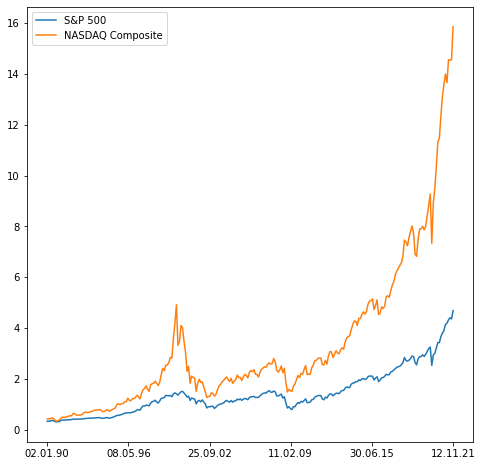

In [115]:
start_date='01.01.1995'
end_date='01.01.2002'

fig, ax = plt.subplots()
ax.plot(s_x, s_y, '-', n_x, n_y, '')
plt.legend(['S&P 500', 'NASDAQ Composite'], loc='best')
ticks_num=6
plt.xticks(ticks=get_ticks(snp_phases[2][2], ticks_num), labels=map(lambda x: x.strftime('%d.%m.%y'), get_ticks(data_nas['date'], ticks_num)))
# plt.savefig(f"Comparison_SnP_Nas_t30_chart.png", dpi=200)
ax.plot()
fig.set_figheight(8)
fig.set_figwidth(8)

plt.show()

In [9]:
# def test(dates, snp_phases):
#     x, y, xx, deriv, tt, slice_period=snp_phases[2]
#     y_lim=(-2700, 2500)
#     x_lim=(0, 16500)
#     deriv=list(map(lambda x: x*1000, deriv))
#     plot_phase_portrait(xx, dates, deriv, tt, 'test', y_limits=y_lim, x_limits=x_lim)
# test(data_nas['date'], nas_phases)

In [52]:
from itertools import chain
y_lims=list(chain(*[(min(slice_data[3][1]), max(slice_data[3][1])) for slice_data in phases]))
# y_lims=tuple(map(np.ceil,(min(y_lims), max(y_lims))))
# y_lim=(-2.7, 2.5)
# x_lim=(0, 268)
y_lims

[-8.247592039059993,
 6.967383893548285,
 -16.065438570050222,
 13.11931609620416,
 -19.93828441868863,
 23.07331122971687]

Wall time: 5min 8s


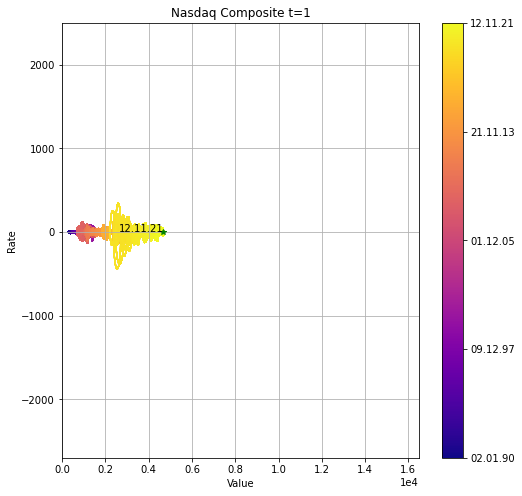

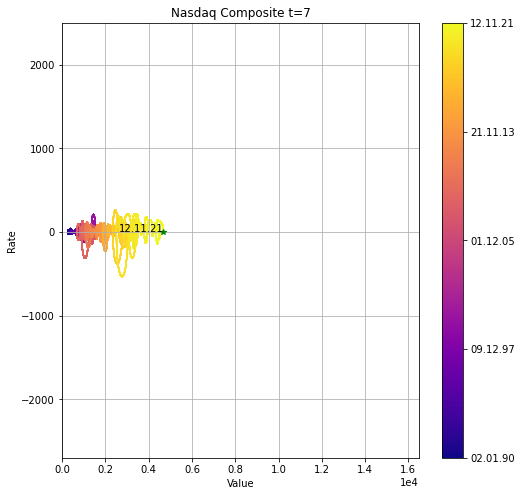

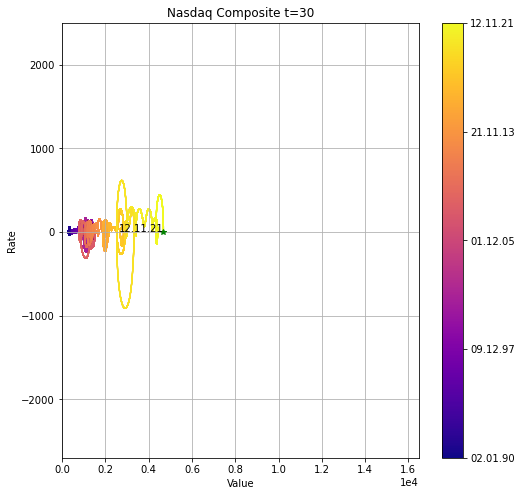

In [15]:
%time generate_png('./S&P500/', 'S&P500', data_snp, snp_phases, y_lim=(-1000, 700), x_lim=(0, 5000), upscale=1000)

Wall time: 4min 50s


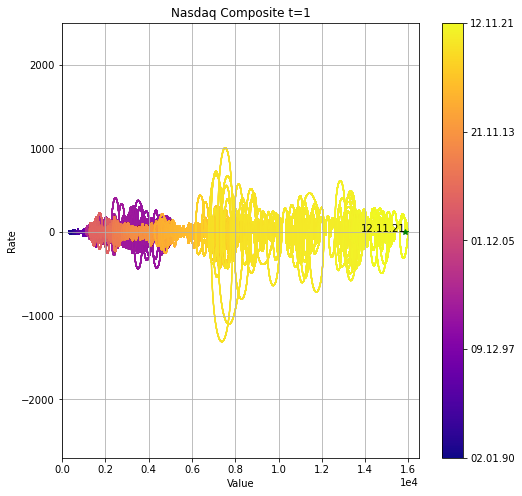

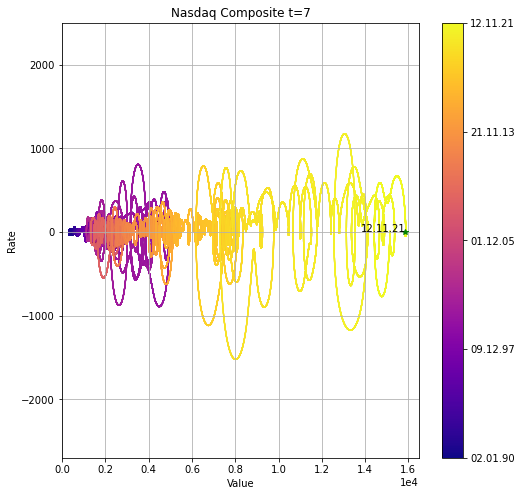

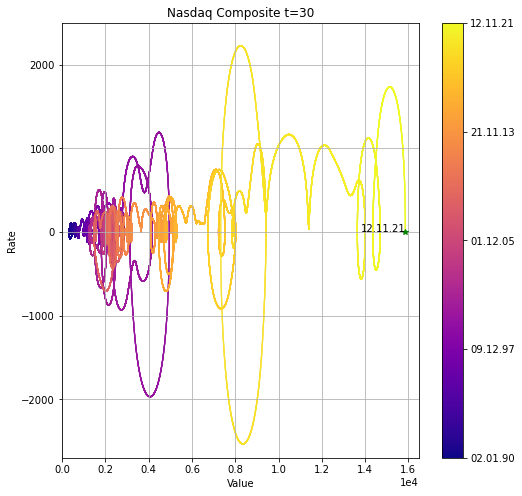

In [16]:
%time generate_png('./Nasdaq/', 'Nasdaq Composite', data_nas, nas_phases, y_lim=(-2700, 2500), x_lim=(0, 16500), upscale=1000)

In [32]:
def test(dates, snp_phases):
    x, y, xx, deriv, tt, slice_period, dates=snp_phases[2]
    start_date='01.01.1995'
    end_date='01.01.2002'
    return get_mask_tt(x, tt, dates,start_date, end_date)
mask=test(data_nas['date'], nas_phases)


In [70]:
def dates_mask(dates, start_date, end_date):
    return (dates >= pd.to_datetime(start_date, format='%d.%m.%Y')) & (
            dates <= pd.to_datetime(end_date, format='%d.%m.%Y'))

In [73]:
dates_mask(dates, start_date1, end_date1)

0      False
1      False
2      False
3      False
4      False
       ...  
302     True
303     True
304     True
305     True
306     True
Name: date, Length: 307, dtype: bool

In [81]:
def get_mask_xx(x, xx, dates, start_date, end_date):
    date_filter = (dates >= pd.to_datetime(start_date, format='%d.%m.%Y')) & (
            dates <= pd.to_datetime(end_date, format='%d.%m.%Y'))
    filtered_x = x[date_filter]
    min_x, max_x = filtered_x.min(), filtered_x.max()
    return (xx >= min_x) & (xx <= max_x)

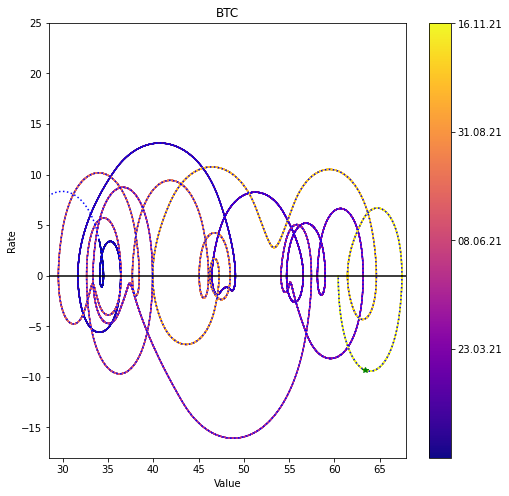

In [88]:
x, y, xx, deriv, tt, slice_period, dates=phases[1]
start_date1='01.01.2021'
end_date1='17.11.2021'
mask_00 = get_mask_tt(x, tt, dates, start_date1, end_date1)

# start_date2='01.01.2006'
# end_date2='01.01.2008'
# mask_08 = get_mask_tt(x, tt, dates, start_date2, end_date2)


fig, ax = plt.subplots()
# ax.plot(deriv[0], deriv[1])
ax.plot(deriv[0], deriv[1], ':b')
# line2, =ax.plot( deriv[0][mask_00], deriv[1][mask_00], '-r', label=f"{start_date1}-{end_date1}")
# line3, =ax.plot( deriv[0][mask_08], deriv[1][mask_08], '-g', label=f"{start_date2}-{end_date2}")
# ax.plot(deriv[0][mask], deriv[1][mask], '-')
###################################
cmap = plt.cm.plasma
norm = plt.Normalize(tt[mask_00].min(), tt[mask_00].max())
c_bar=plt.cm.plasma(np.linspace(0, 1, tt[mask_00].shape[0]))

m_dates=dates_mask(dates, start_date1, end_date1)
m_xx=get_mask_xx(x, xx, dates, start_date1, end_date1)

ax.scatter(deriv[0][mask_00], deriv[1][mask_00], c=c_bar, s=0.1)
ticks_num=5
cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm), ticks=get_ticks(xx[m_xx], ticks_num), orientation='vertical')
cbar.ax.set_yticklabels(map(lambda x: x.strftime('%d.%m.%y'), get_ticks(dates[m_dates], ticks_num)))
###################################

plt.title('BTC')
ax.set_ylabel('Rate')
ax.set_xlabel('Value')
# plt.legend(handles=[line2], loc='best') #, line3
# plt.legend([f"{start_date}-{end_date}"], loc='best')

# plt.legend(['t=1', 't=7', 't=30' ], loc='best')
plt.xlim((deriv[0][mask_00].min()-1, deriv[0][mask_00].max()+0.5))
ax.set_ylim([-18, 25])
plt.axhline(y=0, color='k', linestyle='-')

# xycoords='data',
# xytext=(0.8, 0.95), textcoords='axes fraction',
# arrowprops=dict(facecolor='black', shrink=0.05),
# horizontalalignment='right', verticalalignment='top'

ax.plot(deriv[0][-1000], deriv[1][-1000], '*g', markersize=6)

# ax.plot(deriv[0][mask_000][deriv[1][mask_00]==deriv[1][mask_00].min()], deriv[1][mask_00][deriv[1][mask_00]==deriv[1][mask_00].min()], '*g', markersize=6)
# ax.annotate(dates.iloc[253].strftime('%d.%m.%y'),  
#             xy=(deriv[0][mask_00][deriv[1][mask_00]==deriv[1][mask_00].min()], deriv[1][mask_00][deriv[1][mask_00]==deriv[1][mask_00].min()]), 
#             color='black', 
#             ha="left", textcoords='axes fraction', xytext=(0.6, 0.035))

# plt.savefig(f"{filename}.png", dpi=200)

fig.set_figheight(8)
fig.set_figwidth(8)
plt.show()

In [156]:
def get_filename(name, min_date, max_date, freq='', add=''):
    if freq:
        return f"{name}_{min_date}_to_{max_date}_f_{freq}"
    if add:
        return f"{name}_{min_date}_to_{max_date}_{add}"
    return f"{name}_{min_date}_to_{max_date}"

filename = get_filename("Nasdaq",start_date1, end_date1, add='scaled')
filename

'Nasdaq_01.01.2000_to_01.01.2003'

In [77]:
tt[mask_00][deriv[1][mask_00]==deriv[1][mask_00].min()]

array([253.4315])

In [49]:
np.abs(deriv[1][mask_00])<10^-4

array([False, False, False, ..., False, False, False])

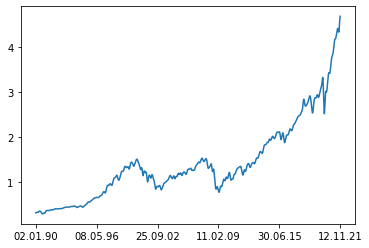

In [80]:
ticks_num=6
plt.plot(tt, deriv[0])
plt.xticks(ticks=get_ticks(xx, ticks_num), labels=map(lambda x: x.strftime('%d.%m.%y'), get_ticks(data_nas['date'], ticks_num)))
plt.show()

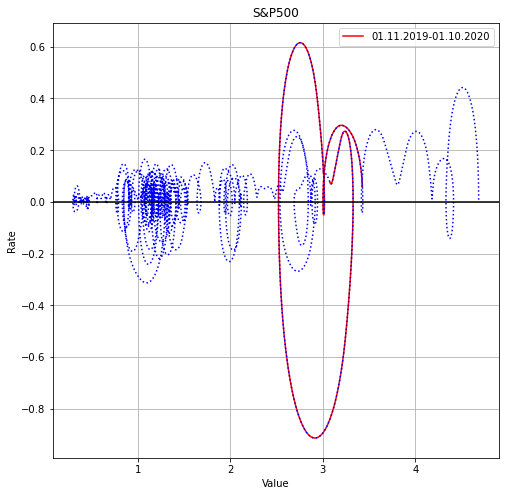

In [58]:
start_date='01.11.2019'
end_date='01.10.2020'
mask = get_mask_tt(x, tt, dates, start_date, end_date)


fig, ax = plt.subplots()
# ax.plot(deriv[0], deriv[1])
ax.plot( deriv[0][mask], deriv[1][mask], '-r', deriv[0], deriv[1], ':b')
# ax.plot(deriv_30[0], deriv_30[1], ':g', deriv_7[0], deriv_7[1], '-.b', deriv_1[0], deriv_1[1], '-r')

plt.title('S&P500')
ax.set_ylabel('Rate')
ax.set_xlabel('Value')

plt.legend([f"{start_date}-{end_date}"], loc='best')

# plt.xlim((deriv[0][mask].min()-0.1, deriv[0][mask].max()+0.2))
plt.grid()
plt.axhline(y=0, color='k', linestyle='-')

fig.set_figheight(8)
fig.set_figwidth(8)
# plt.savefig(f"SnP_t30_Covid.png", dpi=200)
plt.show()

In [68]:
dates

0     2016-01-05
1     2016-01-12
2     2016-01-19
3     2016-01-26
4     2016-02-02
         ...    
302   2021-10-19
303   2021-10-26
304   2021-11-02
305   2021-11-09
306   2021-11-16
Name: date, Length: 307, dtype: datetime64[ns]

In [9]:
x

0        1
1        2
2        3
3        4
4        5
      ... 
263    264
264    265
265    266
266    267
267    268
Length: 268, dtype: int64

In [10]:
mask

array([False, False, False, ..., False, False, False])